In [29]:
import os
import sys
from pathlib import Path
sys.path.append(os.path.join(Path().resolve(), "src/"))

from src.config import ModelConfig, TrainerConfig
from src.dataset import load_dataset_manager
from src.trainers import PyTorchTrainer
from src.analyst import Analyst

In [15]:
# コンフィグの設定
model_config = ModelConfig()
trainer_config = TrainerConfig()

In [26]:
# データセットのロード
dataset_manager = load_dataset_manager(
    dataset_name=trainer_config.dataset_name,
    dataset_dir=trainer_config.dataset_dir,
    load_dataset=trainer_config.load_dataset,
    save_dataset=trainer_config.save_dataset,
    window_size=model_config.window_size,
)

load cached dataset_manager from: cache/dataset/toydata-small.pickle


In [17]:
# Trainerの作成
trainer = PyTorchTrainer(
    dataset_manager=dataset_manager,
    trainer_config=trainer_config,
    model_config=model_config,
)

load_state_dict from: cache/model/toydata-small/attentive.pt


In [18]:
# モデルの学習
trainer.fit()

train start


100%|██████████| 71/71 [00:00<00:00, 319.97it/s]


Epoch: 1, loss: 0.23958276485053587, test_loss: {'test': 0.24000655660327053}
saved best model to cache/model/toydata-small/best-attentive.pt


100%|██████████| 71/71 [00:00<00:00, 321.63it/s]


Epoch: 2, loss: 0.23891678158666046, test_loss: {'test': 0.238784843347442}
saved best model to cache/model/toydata-small/best-attentive.pt


100%|██████████| 71/71 [00:00<00:00, 338.20it/s]

Epoch: 3, loss: 0.2379332417753381, test_loss: {'test': 0.23831479922986368}
saved best model to cache/model/toydata-small/best-attentive.pt
train end
saved model to cache/model/toydata-small/attentive.pt


{'train': [0.23958276485053587, 0.23891678158666046, 0.2379332417753381],
 'test': [0.24000655660327053, 0.238784843347442, 0.23831479922986368]}

In [19]:
# Analyst（モデルの出力を分析するクラス）インスタンスの作成
analyst = Analyst(trainer.model, dataset_manager)

In [20]:
# 系列と要素の関連性（デフォルトだと内積）の出力
analyst.similarity_between_seq_and_item(seq_index=0, num_recent_items=10)

,similarity,item
0,0.604959,v_1_M_2000
1,0.402700,v_1_E_2000
2,0.195290,v_2_E_2000
3,0.195290,v_2_E_2000
4,0.164643,v_2_F_1990
5,0.033569,v_2_M_1960
6,-0.121563,v_1_F_2000
7,-0.125975,v_1_M_1980
8,-0.209825,v_2_F_2000
9,-0.209825,v_2_F_2000


In [21]:
# 系列と要素の補助情報の関連性（デフォルトだと内積）の出力
analyst.similarity_between_seq_and_item_meta(seq_index=0, item_meta_name="genre")

,similarity,item_meta
0,0.122109,genre:F
1,-0.140290,genre:E
2,-0.622595,genre:M


In [22]:
# 系列の補助情報と要素の補助情報の関連性（デフォルトだと内積）の出力
analyst.similarity_between_seq_meta_and_item_meta("gender", "M", "genre")

,similarity,item_meta
0,0.288425,genre:M
1,0.009154,genre:E
2,-0.731324,genre:F


In [23]:
# 系列と要素の固有の特徴と補助情報の関連性（デフォルトだと内積）の出力
analyst.analyze_seq(seq_index=0)

,similarity,seq,item
0,2.609066,gender:F,genre:F
1,1.490470,age:20,genre:M
2,1.343822,age:20,year:2000
3,0.967979,gender:F,year:1990
4,0.829699,gender:F,genre:E
5,0.796977,gender:F,year:1980
6,0.491376,gender:F,year:2000
7,0.399128,u_0_F_20_20_F1,year:1980
8,0.386390,age:20,genre:F
9,0.379840,gender:F,year:1960


(<Figure size 800x400 with 2 Axes>, <AxesSubplot: >)

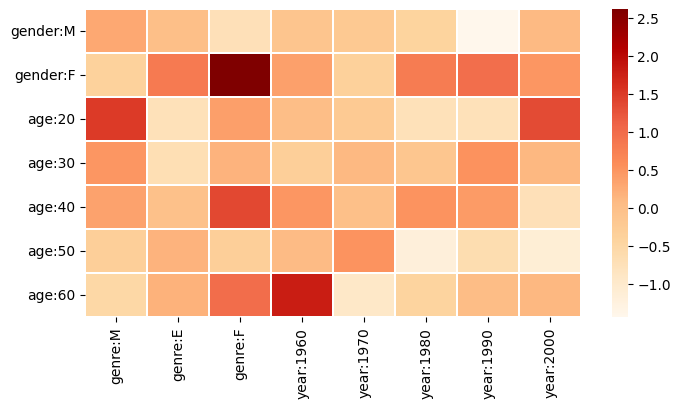

In [24]:
# 補助情報のヒートマップの作成
seq_meta_names = ["gender:M", "gender:F", "age:20", "age:30", "age:40", "age:50", "age:60"]
item_meta_names = ["genre:M", "genre:E", "genre:F", "year:1960", "year:1970", "year:1980", "year:1990", "year:2000"]
analyst.visualize_similarity_heatmap(seq_meta_names, item_meta_names, figsize=(8, 4))